In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.stats import LombScargle
plt.style.use('seaborn-whitegrid')

%matplotlib inline
%config InlineBackend.figure_format='svg'
#%config InlineBackend.figure_format='retina'

In [53]:
wavelengthbb=np.array([1.93,2.6,3.66,4.42,5.52,7.07,9,12.5,16.5,22])*10**-7#m
fluxbb=np.array([4.3*10**-16,1.9*10**-16,1.1*10**-16,6.1*10**-17,2*10**-17,1.1*10**-17,6.2*10**-18,7.7*10**-19,2.9*10**-19,10**-19])

In [54]:
import astropy 
from astropy import units as u
from astropy.modeling.blackbody import blackbody_lambda,blackbody_nu,FLAM
from astropy.modeling import models,fitting
from astropy.modeling.models import BlackBody1D
from astropy.visualization import quantity_support
from scipy.constants import h,k,c

k=1.38*10**-23#J/K
h=6.626*10**-34#J*s
c=3*10**8#m

In [55]:
wavelengthbb,fluxbb

(array([  1.93000000e-07,   2.60000000e-07,   3.66000000e-07,
          4.42000000e-07,   5.52000000e-07,   7.07000000e-07,
          9.00000000e-07,   1.25000000e-06,   1.65000000e-06,
          2.20000000e-06]),
 array([  4.30000000e-16,   1.90000000e-16,   1.10000000e-16,
          6.10000000e-17,   2.00000000e-17,   1.10000000e-17,
          6.20000000e-18,   7.70000000e-19,   2.90000000e-19,
          1.00000000e-19]))

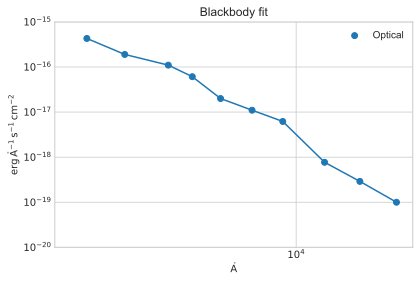

In [110]:
wavelength=wavelengthbb*u.m
wavelengthAA=wavelength.to(u.AA)#u.AA
flux=fluxbb*u.erg*u.cm**-2*u.s**-1*u.AA**-1##
wavelength,wavelengthAA,flux
with quantity_support():
    plt.figure()
    ax=plt.gca()
    ax.scatter(wavelengthAA,flux,label='Optical')
    ax.plot(wavelengthAA,flux)
    plt.xlim(1.5e3,2.5e4)
    plt.ylim(1e-20,1e-15)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.grid(True)
    plt.tight_layout(True)
    plt.title('Blackbody fit')
    plt.legend()
    plt.show()

In [111]:
def Blamda(lamdawave,Tirr):
    blamda=2*h*c**2*lamdawave**(-5)*(np.e**(h*c/lamdawave/k/Tirr)-1)**-1
    return blamda

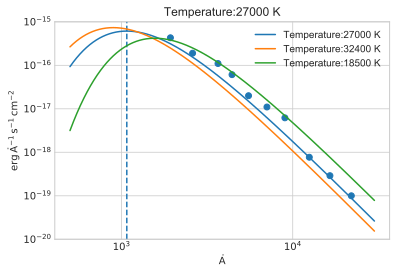

In [134]:
import numpy as np
from scipy import integrate



T1=27000
T2=32400
T3=18500
T4=35000
T5=19000

bb1=BlackBody1D(temperature=T1*u.K,bolometric_flux=1e-12*u.erg*u.cm**-2*u.s**-1)
bb2=BlackBody1D(temperature=T2*u.K,bolometric_flux=1e-12*u.erg*u.cm**-2*u.s**-1)
bb3=BlackBody1D(temperature=T3*u.K,bolometric_flux=1e-12*u.erg*u.cm**-2*u.s**-1)

wave=np.arange(500,30000)*u.AA
fluxwave1=bb1(wave).to(FLAM,u.spectral_density(wave))
fluxwave2=bb2(wave).to(FLAM,u.spectral_density(wave))
fluxwave3=bb3(wave).to(FLAM,u.spectral_density(wave))

fluxtot1=integrate.simps(fluxwave1,wave)#total bolometric luminosity flux
fluxtot2=integrate.simps(fluxwave2,wave)#total bolometric luminosity flux
fluxtot3=integrate.simps(fluxwave3,wave)#total bolometric luminosity flux


with quantity_support():
    plt.figure()
    plt.plot(wave,fluxwave1,label="Temperature:%d K"%T1)
    plt.axvline(bb1.lambda_max.to(u.AA).value,ls='--')
    plt.plot(wave,fluxwave2,label="Temperature:%d K"%T2)
    plt.plot(wave,fluxwave3,label="Temperature:%d K"%T3)
    plt.scatter(wavelength.to(u.AA),flux)
    plt.ylim(1e-20,1e-15)
    plt.semilogx(True)
    plt.semilogy(True)
    plt.title("Temperature:%d K"%T1)
    plt.legend()
    plt.show()

In [135]:
fluxtot1,fluxtot2,fluxtot3

(9.938587576502785e-13, 9.7851884627065752e-13, 9.9906538719330347e-13)

In [97]:
import astropy
from astropy import units as u
from astropy import constants as const


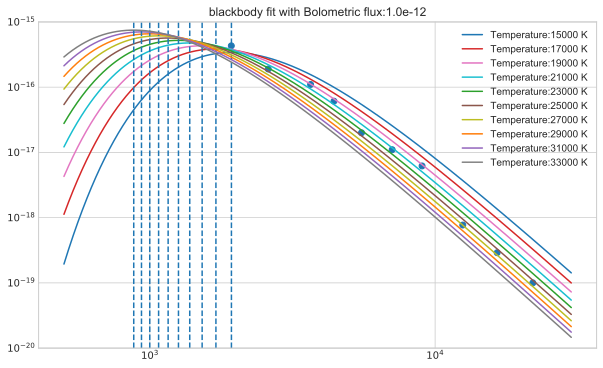

In [133]:
plt.figure(figsize=(10,6))
plt.scatter(wavelength.to(u.AA),flux)
wave=np.arange(500,30000)*u.AA
for T in np.arange(15000,35000,2000):
    bb=BlackBody1D(temperature=T*u.K,bolometric_flux=1e-12*u.erg*u.cm**-2*u.s**-1) 
    fluxwave=bb(wave).to(FLAM,u.spectral_density(wave))
    
    plt.plot(wave,fluxwave,label="Temperature:%d K"%T)
    plt.axvline(bb.lambda_max.to(u.AA).value,ls='--')
    plt.semilogx(True)
    plt.semilogy(True)
    plt.ylim(1e-20,1e-15)
plt.title('blackbody fit with Bolometric flux:1.0e-12')
plt.legend()
plt.show()

In [142]:
from scipy.optimize import curve_fit
import pylab as plt
import numpy as np

x=wavelengthAA/u.AA
y=flux/(u.erg*u.cm**-2*u.s**-1*u.AA**-1)

def Temp_flux(wave,T=5000,flux=1):
    bb=BlackBody1D(temperature=T*u.K,bolometric_flux=flux*u.erg*u.cm**-2*u.s**-1) 
    fluxwave=bb(wave*u.AA).to(FLAM,u.spectral_density(wave*u.AA))
    return fluxwave/(u.erg*u.cm**-2*u.s**-1*u.AA**-1)
    
    

In [143]:
Temp_flux(x),y

(<Quantity [  1.32019600e-06,  1.38727995e-05,  6.19227607e-05,
              9.32678682e-05,  1.12798095e-04,  1.03836666e-04,
              7.61965182e-05,  3.84640279e-05,  1.82903670e-05,
              7.59135471e-06]>,
 <Quantity [  4.30000000e-16,  1.90000000e-16,  1.10000000e-16,
              6.10000000e-17,  2.00000000e-17,  1.10000000e-17,
              6.20000000e-18,  7.70000000e-19,  2.90000000e-19,
              1.00000000e-19]>)

25751.3164219 1.29277830848e-12


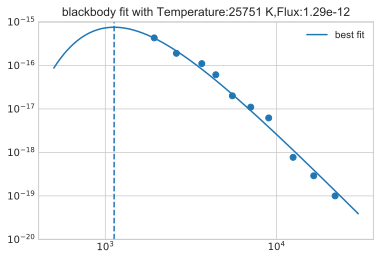

In [165]:
popt, pcov = curve_fit(Temp_flux, x, y, p0=(27000, 1))
bestT, bestflux = popt
sigmaT, sigmaflux = np.sqrt(np.diag(pcov))

wave=np.arange(500,30000)*u.AA
ybest=Temp_flux(wave/u.AA,bestT,bestflux)
bb=BlackBody1D(temperature=bestT*u.K,bolometric_flux=bestflux*u.erg*u.cm**-2*u.s**-1) 


print(bestT, bestflux)

#plt.figure(figsize=(10,6))
plt.plot(wave/u.AA,ybest,label="best fit")
plt.axvline(bb.lambda_max.to(u.AA).value,ls='--')
plt.scatter(x,y)
plt.semilogx(True)
plt.semilogy(True)
plt.ylim(1e-20,1e-15)
plt.title("blackbody fit with Temperature:%d K,Flux:%.2e"%(bestT,bestflux))
plt.legend()
#plt.show()
plt.savefig("best_fit.pdf")

6.62607004e-34 1.38064852e-23 299792458.0
6.62607004e-34 1.38064852e-23 299792458.0
6.62607004e-34 1.38064852e-23 299792458.0
6.62607004e-34 1.38064852e-23 299792458.0
6.62607004e-34 1.38064852e-23 299792458.0
6.62607004e-34 1.38064852e-23 299792458.0
6.62607004e-34 1.38064852e-23 299792458.0
6.62607004e-34 1.38064852e-23 299792458.0
6.62607004e-34 1.38064852e-23 299792458.0
6.62607004e-34 1.38064852e-23 299792458.0
6.62607004e-34 1.38064852e-23 299792458.0
6.62607004e-34 1.38064852e-23 299792458.0
6.62607004e-34 1.38064852e-23 299792458.0
6.62607004e-34 1.38064852e-23 299792458.0
6.62607004e-34 1.38064852e-23 299792458.0
6.62607004e-34 1.38064852e-23 299792458.0
6.62607004e-34 1.38064852e-23 299792458.0
6.62607004e-34 1.38064852e-23 299792458.0
6.62607004e-34 1.38064852e-23 299792458.0
6.62607004e-34 1.38064852e-23 299792458.0
6.62607004e-34 1.38064852e-23 299792458.0
6.62607004e-34 1.38064852e-23 299792458.0
6.62607004e-34 1.38064852e-23 299792458.0
6.62607004e-34 1.38064852e-23 2997

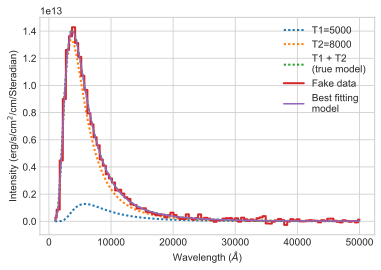

In [30]:
from scipy.optimize import curve_fit
import pylab as plt
import numpy as np

def blackbody_lam(lam, T):
    """ Blackbody as a function of wavelength (A) and temperature (K).
    returns units of erg/s/cm^2/cm/Steradian
    """
    from scipy.constants import h,k,c
    lam = 1e-10 * lam # convert to metres
    print(h,k,c)
    return 2*h*c**2 / (lam**5 * (np.exp(h*c / (lam*k*T)) - 1))*0.1

wa = np.linspace(1000, 50000, 100)   # wavelengths in A
#wa =wa *10**-4 # um

T1 = 5000.
T2 = 8000.
y1 = blackbody_lam(wa, T1)
y2 = blackbody_lam(wa, T2)
ytot = y1 + y2

np.random.seed(1)

# make synthetic data with Gaussian errors

sigma = np.ones(len(wa)) * 1 * np.median(ytot)
ydata = ytot + np.random.randn(len(wa)) * sigma

# plot the input model and synthetic data

plt.figure()
plt.plot(wa, y1, ':', lw=2, label='T1=%.0f' % T1)
plt.plot(wa, y2, ':', lw=2, label='T2=%.0f' % T2)
plt.plot(wa, ytot, ':', lw=2, label='T1 + T2\n(true model)')
plt.plot(wa, ydata, ls='steps-mid', lw=2, label='Fake data')
plt.xlabel('Wavelength ($\AA $)')
plt.ylabel('Intensity (erg/s/cm$^2$/cm/Steradian)')

# fit two blackbodies to the synthetic data

def func(wa, T1, T2):
    return blackbody_lam(wa, T1) + blackbody_lam(wa, T2)

# Note the initial guess values for T1 and T2 (p0 keyword below). They
# are quite different to the known true values, but not *too*
# different. If these are too far away from the solution curve_fit()
# will not be able to find a solution. This is not a Python-specific
# problem, it is true for almost every fitting algorithm for
# non-linear models. The initial guess is important!

popt, pcov = curve_fit(func, wa, ydata, p0=(1000, 3000), sigma=sigma)

# get the best fitting parameter values and their 1 sigma errors
# (assuming the parameters aren't strongly correlated).

bestT1, bestT2 = popt
sigmaT1, sigmaT2 = np.sqrt(np.diag(pcov))

ybest = blackbody_lam(wa, bestT1) + blackbody_lam(wa, bestT2)

print('True model values')
print('  T1 = %.2f' % T1)
print('  T2 = %.2f' % T2)

print('Parameters of best-fitting model:')
print('  T1 = %.2f +/- %.2f' % (bestT1, sigmaT1))
print('  T2 = %.2f +/- %.2f' % (bestT2, sigmaT2))

degrees_of_freedom = len(wa) - 2
resid = (ydata - func(wa, *popt)) / sigma
chisq = np.dot(resid, resid)

print(degrees_of_freedom, 'dof')
print('chi squared %.2f' % chisq)
print('nchi2 %.2f' % (chisq / degrees_of_freedom))

# plot the solution

plt.plot(wa, ybest, label='Best fitting\nmodel')
plt.legend(frameon=False)
plt.savefig('fit_bb.png')
plt.show()